In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('../../Dataset/cleaned_used_cars_v3.csv')

In [3]:
df.shape

(257567, 313)

In [4]:
df.shape

(257567, 313)

In [5]:
df

,seller,offerType,price,abtest,gearbox,powerPS,kilometer,notRepairedDamage,vehicleType.andere,vehicleType.bus,...,model.yeti,model.ypsilon,model.z_reihe,model.zafira,"year_range.[1991, 1996)","year_range.[1996, 2001)","year_range.[2001, 2006)","year_range.[2006, 2011)","year_range.[2011, 2016)","year_range.[2016, 2021)"
0,0,0,7.313887,0,0,-0.353911,0.647340,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,8.188967,0,0,-0.395023,-0.867131,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,6.478510,0,0,-0.168908,0.647340,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,7.696667,0,0,-0.120944,0.647340,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,7.601402,1,0,-0.148352,0.647340,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257562,0,0,8.071219,1,0,0.673887,0.647340,1,0,0,...,0,0,0,0,0,0,1,0,0,0
257563,0,0,7.048386,1,0,-0.867810,0.647340,0,0,1,...,0,0,0,1,0,1,0,0,0,0
257564,0,0,7.090077,0,1,-0.175760,0.016310,0,0,0,...,0,0,0,0,0,1,0,0,0,0
257565,0,0,9.127067,0,0,-0.168908,0.647340,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [6]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [7]:
X = df.drop(['price'], axis=1)
y = df['price']
X

,seller,offerType,abtest,gearbox,powerPS,kilometer,notRepairedDamage,vehicleType.andere,vehicleType.bus,vehicleType.cabrio,...,model.yeti,model.ypsilon,model.z_reihe,model.zafira,"year_range.[1991, 1996)","year_range.[1996, 2001)","year_range.[2001, 2006)","year_range.[2006, 2011)","year_range.[2011, 2016)","year_range.[2016, 2021)"
0,0,0,0,0,-0.353911,0.647340,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,-0.395023,-0.867131,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,-0.168908,0.647340,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,-0.120944,0.647340,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,-0.148352,0.647340,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257562,0,0,1,0,0.673887,0.647340,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
257563,0,0,1,0,-0.867810,0.647340,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
257564,0,0,0,1,-0.175760,0.016310,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
257565,0,0,0,0,-0.168908,0.647340,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.regularizers import L2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16, kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=['mae', r2])

early_stop = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=100, epochs=200, callbacks=[early_stop])

score = model.evaluate(X_test, y_test)
print(f'Deep Learning Regression Mean Absolute Error: {score[1]:.2f}')
print(f'Deep Learning Regression R-squared Score: {score[2]:.2f}')


Epoch 1/200
1649/1649 [==============================] - 8s 3ms/step - loss: 39.7657 - mae: 6.1869 - r2: -35.2942 - val_loss: 25.6890 - val_mae: 4.9992 - val_r2: -22.2911
Epoch 2/200
1649/1649 [==============================] - 4s 2ms/step - loss: 14.8963 - mae: 3.6986 - r2: -12.5182 - val_loss: 6.8764 - val_mae: 2.5114 - val_r2: -5.1380
Epoch 3/200
1649/1649 [==============================] - 3s 2ms/step - loss: 3.0755 - mae: 1.5019 - r2: -1.6832 - val_loss: 0.8371 - val_mae: 0.6974 - val_r2: 0.3695
Epoch 4/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.5907 - mae: 0.5160 - r2: 0.5918 - val_loss: 0.3884 - val_mae: 0.3674 - val_r2: 0.7777
Epoch 5/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.4383 - mae: 0.4094 - r2: 0.7279 - val_loss: 0.3606 - val_mae: 0.3412 - val_r2: 0.7993
Epoch 6/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.4015 - mae: 0.3837 - r2: 0.7576 - val_loss: 0.3389 - val_mae: 0.3271 - val_r2: 0.8142

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               40064     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0

In [10]:
model.get_weights()

[array([[-0.02476488, -0.03233286, -0.12268435, ..., -0.02130151,
          0.02794982, -0.09671581],
        [ 0.06158083, -0.14092186,  0.07704749, ..., -0.04137959,
          0.1710925 ,  0.16897114],
        [ 0.00977157,  0.02766536, -0.01247021, ..., -0.01611195,
         -0.01693338,  0.02855022],
        ...,
        [ 0.09547324,  0.04725882,  0.0979272 , ..., -0.02905407,
         -0.10735063, -0.03961473],
        [-0.04241914,  0.0441306 , -0.04827134, ...,  0.03821047,
         -0.06546972,  0.02542025],
        [ 0.16235821, -0.17820801, -0.04089845, ...,  0.1707306 ,
          0.08378506, -0.18474913]], dtype=float32),
 array([-2.1058614e-03,  4.7589163e-03,  1.3300653e-03, -1.4281822e-03,
         8.7412749e-04, -4.5973068e-04, -3.9729290e-03,  1.6876655e-05,
        -1.1427091e-03,  3.1884329e-03, -1.9788858e-03, -2.9813095e-03,
        -3.6354815e-03, -6.1345412e-03, -6.6787065e-03, -1.3108886e-03,
        -4.7642447e-04,  3.8269986e-03,  1.9108643e-03, -3.0844237e-03

In [11]:
predictions = model.predict(X_test)

print(predictions)

1610/1610 [==============================] - 2s 937us/step
[[9.758306 ]
 [6.6748753]
 [6.6902943]
 ...
 [7.0301538]
 [6.9962068]
 [6.505438 ]]


In [12]:
y_test

43806     9.648595
217182    6.216606
137747    7.403061
74434     6.216606
55548     9.457279
            ...   
54430     6.216606
119793    9.648595
139112    7.170120
221066    6.216606
116067    6.216606
Name: price, Length: 51514, dtype: float64

In [13]:
import plotly.express as px
import pandas as pd

df_graph = pd.DataFrame(history.history)

fig = px.line(df_graph, x=df_graph.index+1, y=['loss', 'val_loss'], labels={'x':'Epoch', 'value':'Loss'},
              title='Training and Validation Loss')
fig.update_traces(mode='lines')
fig.show()

fig = px.line(df_graph, x=df_graph.index+1, y=['mae', 'val_mae'], labels={'x':'Epoch', 'value':'MAE'},
              title='Training and Validation MAE')
fig.update_traces(mode='lines')
fig.show()

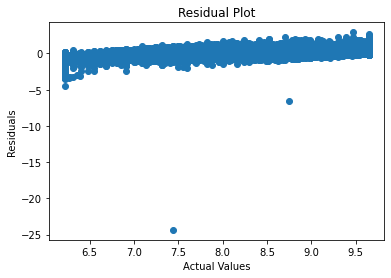

In [14]:
residuals = y_test - predictions.flatten()

plt.scatter(y_test, residuals, )
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

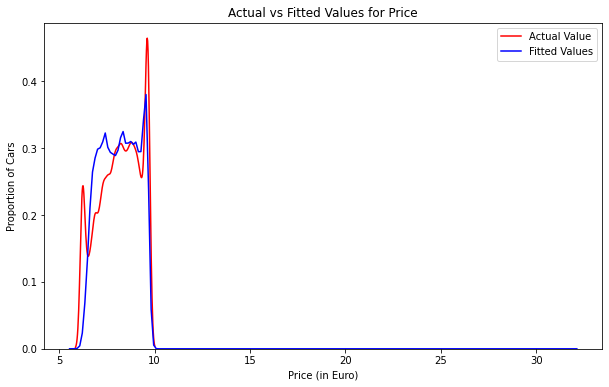

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

enmax_palette = ["#ff7f0e", "#1f77b4"]
color_codes_wanted = ['orange', 'blue']

c = lambda x: enmax_palette[color_codes_wanted.index(x)]
plt.figure(figsize=(10, 6))


ax1 = sns.kdeplot(y_test, color='r', label="Actual Value")
sns.kdeplot(predictions.flatten(), color='b', label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in Euro)')
plt.ylabel('Proportion of Cars')
ax1.legend()
plt.show()
plt.close()

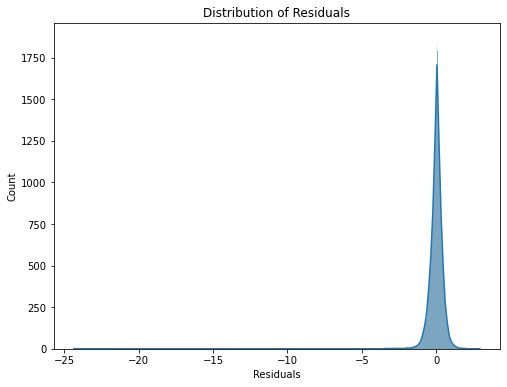

In [16]:
residuals = y_test - predictions.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(x=residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

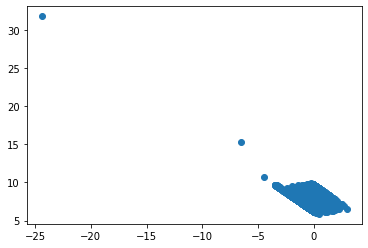

In [18]:
import matplotlib.pyplot as plt

plt.scatter(residuals,predictions.flatten())

plt.show()

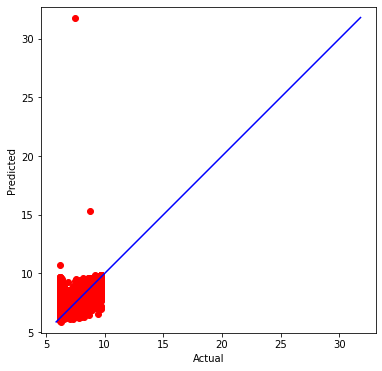

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions.flatten(), c='r')

p1 = max(max(predictions.flatten()), max(y_test))
p2 = min(min(predictions.flatten()), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axis('equal')
plt.show()

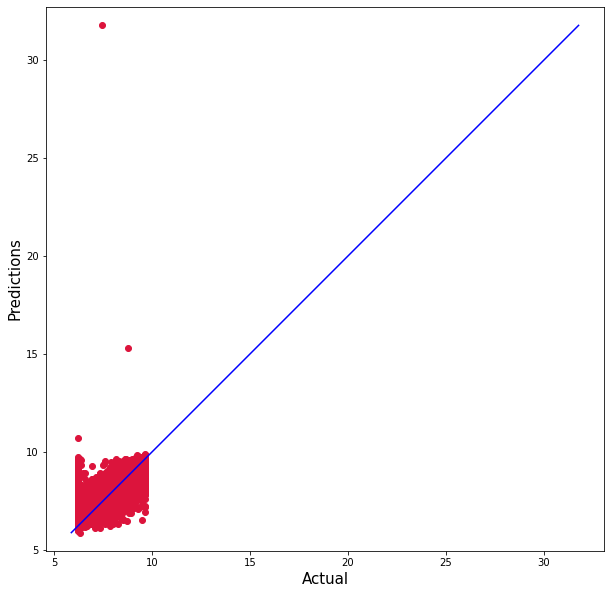

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions.flatten(), c='crimson')

p1 = max(max(predictions.flatten()), max(y_test))
p2 = min(min(predictions.flatten()), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()